In [ ]:
pip install quandl

In [ ]:
pip install requests

In [ ]:
pip install mpld3

In [ ]:
pip install panel

In [ ]:
pip install hvplot

In [ ]:
pip install plotly

In [ ]:
pip install vega_datasets 

In [1]:
import os 
import pandas as pd
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from panel.interact import interact
from panel import widgets
import requests 
from datetime import datetime
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import quandl
import seaborn
from vega_datasets import data
import json
%matplotlib inline 

In [2]:
load_dotenv()

True

In [3]:
#Fiat Currency API
USDD = "http://www.quandl.com/api/v3/datasets/ECB/EURUSD"

JPY = "http://www.quandl.com/api/v3/datasets/BOE/XUDLJYD"

CNY = "http://www.quandl.com/api/v3/datasets/BOE/XUDLBK73"

In [4]:

response_data_usd = requests.get(USDD)
response_data_usd
response_content_usd = response_data_usd.content
response_content_usd
data_usd = response_data_usd.json()

response_data_jpy = requests.get(JPY)
response_data_jpy
response_content_jpy = response_data_jpy.content
response_content_jpy
data_jpy = response_data_jpy.json()


response_data_cny = requests.get(CNY)
response_data_cny
response_content_cny = response_data_cny.content
response_content_cny
data_cny = response_data_cny.json()


In [5]:
#Dataframe cleaning shaping and column nameing for EURUSD df
df_content=data_usd['dataset']['data']
df=pd.DataFrame(df_content)
df.head()

0       1
0  2021-06-18  1.1898
1  2021-06-17  1.1937
2  2021-06-16  1.2124
3  2021-06-15  1.2108
4  2021-06-14  1.2112

In [6]:
df_EURUSD=df.columns =['Date', 'EURUSD']
df

Date  EURUSD
0     2021-06-18  1.1898
1     2021-06-17  1.1937
2     2021-06-16  1.2124
3     2021-06-15  1.2108
4     2021-06-14  1.2112
...          ...     ...
5745  1999-01-08  1.1659
5746  1999-01-07  1.1632
5747  1999-01-06  1.1743
5748  1999-01-05  1.1790
5749  1999-01-04  1.1789

[5750 rows x 2 columns]

In [7]:
df.set_index(pd.to_datetime(df['Date'], infer_datetime_format=True), inplace=True)
df.head()


Date  EURUSD
Date                          
2021-06-18  2021-06-18  1.1898
2021-06-17  2021-06-17  1.1937
2021-06-16  2021-06-16  1.2124
2021-06-15  2021-06-15  1.2108
2021-06-14  2021-06-14  1.2112

In [8]:
df=df.drop(columns=['Date'])
df.head()

EURUSD
Date              
2021-06-18  1.1898
2021-06-17  1.1937
2021-06-16  1.2124
2021-06-15  1.2108
2021-06-14  1.2112

In [9]:
df=df[df.index > '2015-01-01 01:00:00']
df

EURUSD
Date              
2021-06-18  1.1898
2021-06-17  1.1937
2021-06-16  1.2124
2021-06-15  1.2108
2021-06-14  1.2112
...            ...
2015-01-08  1.1768
2015-01-07  1.1831
2015-01-06  1.1914
2015-01-05  1.1915
2015-01-02  1.2043

[1653 rows x 1 columns]

In [10]:
#Beginning of JPY dataframe creation and cleaning 
df2_content=data_jpy['dataset']['data']
df2=pd.DataFrame(df2_content)
df2.head()

0       1
0  2021-06-17  110.24
1  2021-06-16  109.94
2  2021-06-15  110.11
3  2021-06-14  109.99
4  2021-06-11  109.77

In [11]:
df_USDJPY=df2.columns =['Date', 'USDJPY']
df2

Date  USDJPY
0      2021-06-17  110.24
1      2021-06-16  109.94
2      2021-06-15  110.11
3      2021-06-14  109.99
4      2021-06-11  109.77
...           ...     ...
11743  1975-01-08  300.70
11744  1975-01-07  300.65
11745  1975-01-06  300.85
11746  1975-01-03  300.65
11747  1975-01-02  300.75

[11748 rows x 2 columns]

In [12]:
df2.set_index(pd.to_datetime(df2['Date'], infer_datetime_format=True), inplace=True)
df2.head()


Date  USDJPY
Date                          
2021-06-17  2021-06-17  110.24
2021-06-16  2021-06-16  109.94
2021-06-15  2021-06-15  110.11
2021-06-14  2021-06-14  109.99
2021-06-11  2021-06-11  109.77

In [13]:
df2=df2[df2.index > '2015-01-01 01:00:00']

In [14]:
#Beginning of CNY dataframe creation and cleaning 
df3_content=data_cny['dataset']['data']
df3=pd.DataFrame(df3_content)
df3.head()

0       1
0  2021-06-17  6.4470
1  2021-06-16  6.3969
2  2021-06-15  6.4052
3  2021-06-14  6.3967
4  2021-06-11  6.3972

In [15]:
df_USDCNY=df3.columns =['Date', 'USDCNY']
df3

Date  USDCNY
0     2021-06-17  6.4470
1     2021-06-16  6.3969
2     2021-06-15  6.4052
3     2021-06-14  6.3967
4     2021-06-11  6.3972
...          ...     ...
4095  2005-04-07  8.2765
4096  2005-04-06  8.2765
4097  2005-04-05  8.2765
4098  2005-04-04  8.2765
4099  2005-04-01  8.2765

[4100 rows x 2 columns]

In [16]:
df3.set_index(pd.to_datetime(df3['Date'], infer_datetime_format=True), inplace=True)
df3.head()


Date  USDCNY
Date                          
2021-06-17  2021-06-17  6.4470
2021-06-16  2021-06-16  6.3969
2021-06-15  2021-06-15  6.4052
2021-06-14  2021-06-14  6.3967
2021-06-11  2021-06-11  6.3972

In [17]:
df3=df3[df3.index > '2015-01-01 01:00:00']
df3

Date  USDCNY
Date                          
2021-06-17  2021-06-17  6.4470
2021-06-16  2021-06-16  6.3969
2021-06-15  2021-06-15  6.4052
2021-06-14  2021-06-14  6.3967
2021-06-11  2021-06-11  6.3972
...                ...     ...
2015-01-08  2015-01-08  6.2143
2015-01-07  2015-01-07  6.2127
2015-01-06  2015-01-06  6.2125
2015-01-05  2015-01-05  6.2201
2015-01-02  2015-01-02  6.2046

[1635 rows x 2 columns]

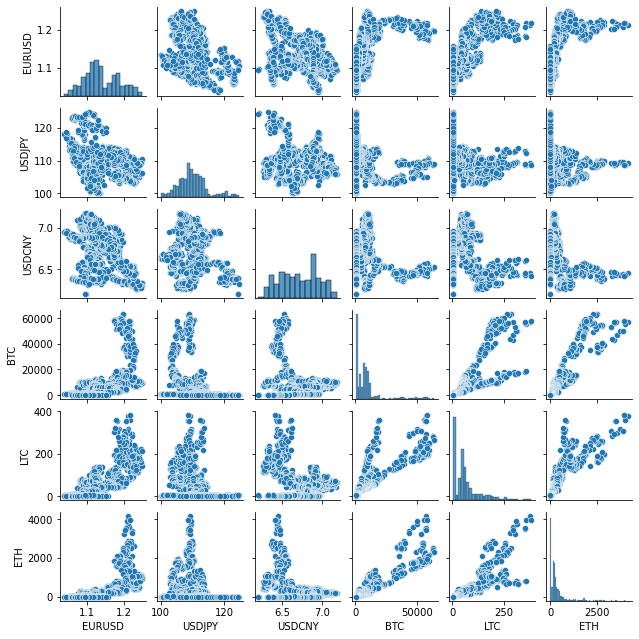

In [46]:
seaborn.pairplot(combined_currency_df, height=1.5)

In [19]:
response_data_btc = requests.get(BTC)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()

response_data_ltc = requests.get(LTC)
response_data_ltc
response_content_ltc = response_data_ltc.content
response_content_ltc
data_ltc = response_data_ltc.json()

response_data_eth = requests.get(ETH)
response_data_eth
response_content_eth = response_data_eth.content
response_content_eth
data_eth = response_data_eth.json()

In [ ]:
response_data_ltc = requests.get(LTC)
response_data_ltc
response_content_ltc = response_data_ltc.content
response_content_ltc
data_ltc = response_data_ltc.json()

In [ ]:
response_data_eth = requests.get(ETH)
response_data_eth
response_content_eth = response_data_eth.content
response_content_eth
data_eth = response_data_eth.json()

In [20]:
#Dataframe cleaning shaping and column nameing for Bitcoin df
df4_content=data_btc['prices']
df4=pd.DataFrame(df4_content)
df4.head()

0         1
0  1420156800000  314.4460
1  1420243200000  286.5720
2  1420329600000  260.9360
3  1420416000000  273.2200
4  1420502400000  285.3738

In [21]:
df4_USDBTC=df4.columns =['Date', 'BTC']
df4.head()

Date       BTC
0  1420156800000  314.4460
1  1420243200000  286.5720
2  1420329600000  260.9360
3  1420416000000  273.2200
4  1420502400000  285.3738

In [22]:
df4["datetime"] = pd.to_datetime(df4['Date'], unit="ms")
df4["Date"] = df4["datetime"].dt.date
df4

Date           BTC   datetime
0     2015-01-02    314.446000 2015-01-02
1     2015-01-03    286.572000 2015-01-03
2     2015-01-04    260.936000 2015-01-04
3     2015-01-05    273.220000 2015-01-05
4     2015-01-06    285.373800 2015-01-06
...          ...           ...        ...
2350  2021-06-10  37553.643759 2021-06-10
2351  2021-06-11  36903.304907 2021-06-11
2352  2021-06-12  37289.432522 2021-06-12
2353  2021-06-13  35666.149779 2021-06-13
2354  2021-06-14  39147.705679 2021-06-14

[2355 rows x 3 columns]

In [23]:
df4=df4.drop(columns=['datetime'])
df4.head()

Date       BTC
0  2015-01-02  314.4460
1  2015-01-03  286.5720
2  2015-01-04  260.9360
3  2015-01-05  273.2200
4  2015-01-06  285.3738

In [24]:
df4.set_index(pd.to_datetime(df4['Date'], infer_datetime_format=True), inplace=True)
df4.head()

Date       BTC
Date                            
2015-01-02  2015-01-02  314.4460
2015-01-03  2015-01-03  286.5720
2015-01-04  2015-01-04  260.9360
2015-01-05  2015-01-05  273.2200
2015-01-06  2015-01-06  285.3738

In [25]:
df4=df4.drop(columns=['Date'])
df4

BTC
Date                    
2015-01-02    314.446000
2015-01-03    286.572000
2015-01-04    260.936000
2015-01-05    273.220000
2015-01-06    285.373800
...                  ...
2021-06-10  37553.643759
2021-06-11  36903.304907
2021-06-12  37289.432522
2021-06-13  35666.149779
2021-06-14  39147.705679

[2355 rows x 1 columns]

In [26]:
df4=df4.sort_index(axis=0,ascending=False) 
df4

BTC
Date                    
2021-06-14  39147.705679
2021-06-13  35666.149779
2021-06-12  37289.432522
2021-06-11  36903.304907
2021-06-10  37553.643759
...                  ...
2015-01-06    285.373800
2015-01-05    273.220000
2015-01-04    260.936000
2015-01-03    286.572000
2015-01-02    314.446000

[2355 rows x 1 columns]

In [27]:
#Dataframe cleaning shaping and column nameing for Litecoin df
df5_content=data_ltc['prices']
df5=pd.DataFrame(df5_content)
df5.head()

0        1
0  1367107200000  4.29983
1  1367193600000  4.35940
2  1367280000000  4.18295
3  1367366400000  3.64914
4  1367452800000  3.38879

In [28]:
df5_LTC=df5.columns =['Date', 'LTC']
df5.head()

Date      LTC
0  1367107200000  4.29983
1  1367193600000  4.35940
2  1367280000000  4.18295
3  1367366400000  3.64914
4  1367452800000  3.38879

In [29]:
df5["datetime"] = pd.to_datetime(df5['Date'], unit="ms")
df5["Date"] = df5["datetime"].dt.date
df5

Date         LTC            datetime
0     2013-04-28    4.299830 2013-04-28 00:00:00
1     2013-04-29    4.359400 2013-04-29 00:00:00
2     2013-04-30    4.182950 2013-04-30 00:00:00
3     2013-05-01    3.649140 2013-05-01 00:00:00
4     2013-05-02    3.388790 2013-05-02 00:00:00
...          ...         ...                 ...
2969  2021-06-16  175.941467 2021-06-16 00:00:00
2970  2021-06-17  165.462806 2021-06-17 00:00:00
2971  2021-06-18  166.945754 2021-06-18 00:00:00
2972  2021-06-19  156.092429 2021-06-19 00:00:00
2973  2021-06-20  146.051269 2021-06-20 10:27:29

[2974 rows x 3 columns]

In [30]:
df5=df5.drop(columns=['datetime'])
df5.head()

Date      LTC
0  2013-04-28  4.29983
1  2013-04-29  4.35940
2  2013-04-30  4.18295
3  2013-05-01  3.64914
4  2013-05-02  3.38879

In [31]:
df5.set_index(pd.to_datetime(df5['Date'], infer_datetime_format=True), inplace=True)
df5.head()

Date      LTC
Date                           
2013-04-28  2013-04-28  4.29983
2013-04-29  2013-04-29  4.35940
2013-04-30  2013-04-30  4.18295
2013-05-01  2013-05-01  3.64914
2013-05-02  2013-05-02  3.38879

In [32]:
df5=df5.drop(columns=['Date'])
df5

LTC
Date                  
2013-04-28    4.299830
2013-04-29    4.359400
2013-04-30    4.182950
2013-05-01    3.649140
2013-05-02    3.388790
...                ...
2021-06-16  175.941467
2021-06-17  165.462806
2021-06-18  166.945754
2021-06-19  156.092429
2021-06-20  146.051269

[2974 rows x 1 columns]

In [33]:
df5=df5.sort_index(axis=0,ascending=False) 
df5

LTC
Date                  
2021-06-20  146.051269
2021-06-19  156.092429
2021-06-18  166.945754
2021-06-17  165.462806
2021-06-16  175.941467
...                ...
2013-05-02    3.388790
2013-05-01    3.649140
2013-04-30    4.182950
2013-04-29    4.359400
2013-04-28    4.299830

[2974 rows x 1 columns]

In [34]:
df5=df5[df5.index > '2015-01-01 01:00:00']
df5

LTC
Date                  
2021-06-20  146.051269
2021-06-19  156.092429
2021-06-18  166.945754
2021-06-17  165.462806
2021-06-16  175.941467
...                ...
2015-01-06    2.132924
2015-01-05    2.084590
2015-01-04    1.939972
2015-01-03    2.164153
2015-01-02    2.679196

[2361 rows x 1 columns]

In [35]:
#Dataframe cleaning shaping and column nameing for Ethereum df
df6_content=data_eth['prices']
df6=pd.DataFrame(df6_content)
df6.head()

0         1
0  1438905600000  2.831620
1  1438992000000  1.330750
2  1439164800000  0.687586
3  1439251200000  1.067379
4  1439337600000  1.256613

In [36]:
df6_ETH=df6.columns =['Date', 'ETH']
df6.head()

Date       ETH
0  1438905600000  2.831620
1  1438992000000  1.330750
2  1439164800000  0.687586
3  1439251200000  1.067379
4  1439337600000  1.256613

In [37]:
df6["datetime"] = pd.to_datetime(df6['Date'], unit="ms")
df6["Date"] = df6["datetime"].dt.date
df6

Date          ETH            datetime
0     2015-08-07     2.831620 2015-08-07 00:00:00
1     2015-08-08     1.330750 2015-08-08 00:00:00
2     2015-08-10     0.687586 2015-08-10 00:00:00
3     2015-08-11     1.067379 2015-08-11 00:00:00
4     2015-08-12     1.256613 2015-08-12 00:00:00
...          ...          ...                 ...
2139  2021-06-16  2561.188331 2021-06-16 00:00:00
2140  2021-06-17  2365.872786 2021-06-17 00:00:00
2141  2021-06-18  2380.744520 2021-06-18 00:00:00
2142  2021-06-19  2231.554315 2021-06-19 00:00:00
2143  2021-06-20  2214.816325 2021-06-20 05:18:26

[2144 rows x 3 columns]

In [38]:
df6=df6.drop(columns=['datetime'])
df6.head()

Date       ETH
0  2015-08-07  2.831620
1  2015-08-08  1.330750
2  2015-08-10  0.687586
3  2015-08-11  1.067379
4  2015-08-12  1.256613

In [39]:
df6.set_index(pd.to_datetime(df6['Date'], infer_datetime_format=True), inplace=True)
df6.head()

Date       ETH
Date                            
2015-08-07  2015-08-07  2.831620
2015-08-08  2015-08-08  1.330750
2015-08-10  2015-08-10  0.687586
2015-08-11  2015-08-11  1.067379
2015-08-12  2015-08-12  1.256613

In [40]:
df6=df6.drop(columns=['Date'])
df6

ETH
Date                   
2015-08-07     2.831620
2015-08-08     1.330750
2015-08-10     0.687586
2015-08-11     1.067379
2015-08-12     1.256613
...                 ...
2021-06-16  2561.188331
2021-06-17  2365.872786
2021-06-18  2380.744520
2021-06-19  2231.554315
2021-06-20  2214.816325

[2144 rows x 1 columns]

In [42]:
df6=df6[df6.index > '2015-01-01 01:00:00']
df6

ETH
Date                   
2021-06-20  2214.816325
2021-06-19  2231.554315
2021-06-18  2380.744520
2021-06-17  2365.872786
2021-06-16  2561.188331
...                 ...
2015-08-12     1.256613
2015-08-11     1.067379
2015-08-10     0.687586
2015-08-08     1.330750
2015-08-07     2.831620

[2144 rows x 1 columns]

In [ ]:
eur_usd_vs_btc = pd.concat([df, df4], axis="columns", join="inner")


In [ ]:
usd_yrn_vs_btc = pd.concat([df2, df4], axis="columns", join="inner")


In [ ]:
usd_yrn_vs_btc=usd_yrn_vs_btc.drop(columns=['Date'])


In [ ]:
ltc_vs_btc = pd.concat([df5, df4], axis="columns", join="inner")


In [ ]:
usd_cyn_vs_btc = pd.concat([df3, df4], axis="columns", join="inner")


In [ ]:
usd_cyn_vs_btc.pct_change(periods=10, axis=0).hvplot.line(title="USDCYN Vs Btc",figsize=(12,10))

In [44]:
combined_currency_df.pct_change(periods=10, axis=0).hvplot.line(title="Currency Correlation",figsize=(30,20))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
combined_currency_df.corr().style.background_gradient(cmap='coolwarm')

<AxesSubplot:>

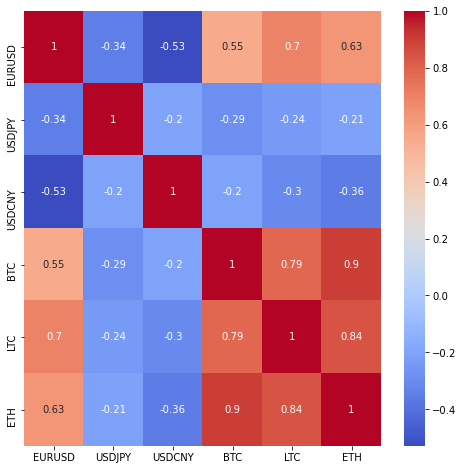

In [48]:
plt.figure(figsize=(8,8))
seaborn.heatmap(combined_currency_df.corr(),annot=True, cmap='coolwarm')

In [ ]:
combined_currency_df.corr().style.background_gradient(cmap='coolwarm')